In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Tuition Data from IPEDS

Student Charges: What is the average amount of tuition and required fees for full-time undergraduate students at private postsecondary institutions operating on an academic year calendar system?

In academic year 2023-24, the average amount of tuition and required fees for full-time undergraduate students at private postsecondary institutions operating on an academic year calendar system was $28,529. This is based on 1,956 institutions, limited by Institutional category and Degree-granting status.*

In [4]:
private_non_degree_df = pd.read_csv('../data/tuition_summary.csv')
private_non_degree_df = private_non_degree_df.rename(columns={"Average amount (in USD)":"Average Tuition & Feeds"})
private_non_degree_df['private_public'] = "private"
private_non_degree_df['degree_granting'] = False

private_degree_df = pd.read_csv('../data/degree_granting_tuition_summary.csv', skiprows=4, nrows=22)
private_degree_df = private_degree_df.rename(columns={"Average amount (in USD)":"Average Tuition & Feeds"})
private_degree_df['private_public'] = "private"
private_degree_df['degree_granting'] = True

private_non_degree_df["Academic Year Parsed"] = private_non_degree_df["Academic Year"].str.split("-").str[0]
private_degree_df["Academic Year Parsed"] = private_degree_df["Academic Year"].str.split("-").str[0]

private_non_degree_df["Academic Year Parsed"] = pd.to_datetime(private_non_degree_df["Academic Year Parsed"])
private_degree_df["Academic Year Parsed"] = pd.to_datetime(private_degree_df["Academic Year Parsed"])

private_combined = pd.merge(private_degree_df, private_non_degree_df, how="outer")
private_combined["Average Tuition & Feeds"] = private_combined["Average Tuition & Feeds"].str.replace("$","").str.replace(",","")
private_combined["Average Tuition & Feeds"] = private_combined["Average Tuition & Feeds"].astype('float')
private_combined['Academic Year Parsed'] = pd.to_datetime(
    private_combined['Academic Year Parsed'], format="%Y"
)


private_combined = private_combined.sort_values('Academic Year Parsed',ascending=True)

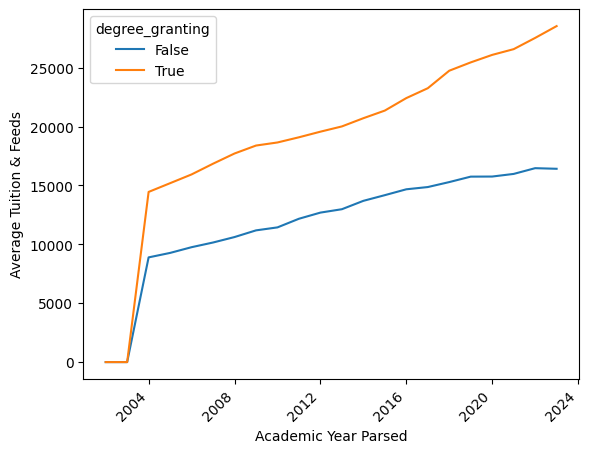

In [5]:
ax = sns.lineplot(
    data=private_combined,
    x='Academic Year Parsed',
    y='Average Tuition & Feeds',
    hue='degree_granting'
)

plt.xticks(rotation=45, ha='right')
plt.show()

## Financial Aid

In [21]:
aid_df = pd.read_csv('../data/financial_aid.csv',skiprows=3, nrows=22)

aid_df["Year Parsed"] = aid_df["Year"].str.split("-").str[0]
aid_df["Year Parsed"] = pd.to_datetime(aid_df["Year Parsed"])
aid_df.columns

aid_df = pd.melt(aid_df, id_vars=['Year Parsed'], value_vars=['Degree-granting',
       'Non-degree-granting, primarily postsecondary'])

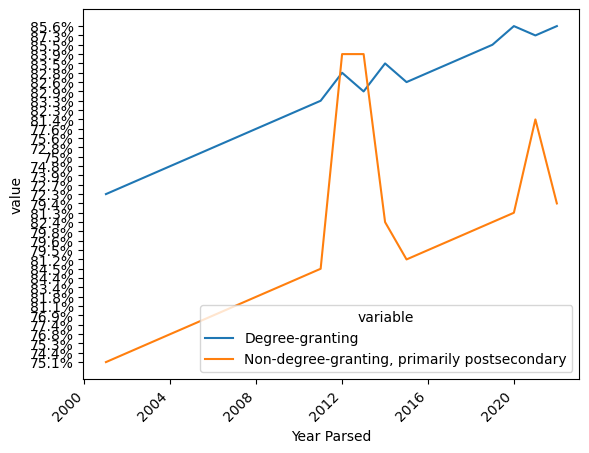

In [33]:
ax = sns.lineplot(
    data=aid_df,
    x='Year Parsed',
    y='value',
    hue='variable'
)

plt.xticks(rotation=45, ha='right', minor=False)
plt.yticks()
plt.show()